# Import Libraries

In [4]:

# Graphing capabilities
import matplotlib.pyplot as plt

# Data management
import pandas as pd
import numpy as np

# Normalization
from keras.utils import normalize, to_categorical

# For stratified 10-fold cross validation
from sklearn.model_selection import StratifiedKFold

# Scikit-Learn ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



# Load Dataset

In [5]:
df=pd.read_csv("./ISCXURL2016/FinalDataset/All.csv")
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [6]:
# Dataset with null values
print('There are {} columns and {} rows in the provided data.'.format(len(df.columns), len(df)))
dep_var = 'URL_Type_obf_Type'
print(df[dep_var].value_counts())

There are 80 columns and 36707 rows in the provided data.
Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: URL_Type_obf_Type, dtype: int64


In [7]:
df.dropna(axis='index', inplace=True)

In [8]:
# Dataset without null values
print('There are {} columns and {} rows in the provided data.'.format(len(df.columns), len(df)))
dep_var = 'URL_Type_obf_Type'
print(df[dep_var].value_counts())

There are 80 columns and 18982 rows in the provided data.
spam          5342
malware       4440
phishing      4014
benign        2709
Defacement    2477
Name: URL_Type_obf_Type, dtype: int64


In [9]:
def train_and_eval_on(X, y, feature_set):
    """
    train_and_eval_on function
        Description: This function will train all the models on the given feature set of the X (data) for predicting y (target)

        Args: 
            X => pd.DataFrame object containing the data
            y => pd.Series object containings the target classifications
            feature_set => list of features in X to use for training

        Returns:
            metrics => dictionary where the model names are the key and a list of accuracies across all folds is the value
                    Keys:
                        Random Forest => rf
                        Decision Tree => dt
                        k-Nearest Neighbors => knn
                        
    """
    metrics = {'rf':[],
                'dt':[],
                'knn':[],
               }

    # Select the given features within the data
    X = X[feature_set]

    print('Training with {} features'.format(len(X.columns)))

    # Create stratified, 10-fold cross validation object
    random_state = 0
    sss = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

    # Experiment with 10-fold cross validation
    for train_idx, test_idx in sss.split(X, y):
        # Split the data into the training and testing sets
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Random Forest Model
        rf = RandomForestClassifier(random_state=random_state)
        rf.fit(X_train, y_train)
        score = rf.score(X_test, y_test)
        metrics['rf'].append(score)

        # Decision Tree Model
        dt = DecisionTreeClassifier(random_state=random_state)
        dt.fit(X_train, y_train)
        score = dt.score(X_test, y_test)
        metrics['dt'].append(score)

        # k-Nearest Neighbors Model
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        metrics['knn'].append(score)

        """# Support Vector Machine Model
        svm = SVC(random_state=random_state)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        metrics['svm'].append(score)

        # Logistic Regression Model
        lr = LogisticRegression(random_state=random_state)
        lr.fit(X_train, y_train)
        score = lr.score(X_test, y_test)
        metrics['lr'].append(score)

        # Linear Discriminant Analysis Model
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train, y_train)
        score = lda.score(X_test, y_test)
        metrics['lda'].append(score)

        # AdaBoost Model
        ab = AdaBoostClassifier(random_state=random_state)
        ab.fit(X_train, y_train)
        score = ab.score(X_test, y_test)
        metrics['ab'].append(score)

        # Naive Bayes Model
        nb = GaussianNB()
        nb.fit(X_train, y_train)
        score = nb.score(X_test, y_test)
        metrics['nb'].append(score)

        # Keras-TensorFlow DNN Model
        dnn_keras = Sequential(layers=[
                                 Dense(128, kernel_regularizer=l2(0.001), activation='relu',input_shape=(len(X_train.columns),)),
                                 BatchNormalization(),
                                 Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
                                 BatchNormalization(),
                                 Dense(y_train.nunique(), activation='softmax')
        ])
        dnn_keras.compile(
            optimizer='adam', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])
        dnn_keras.fit(X_train, pd.get_dummies(y_train), epochs=100, verbose=0, batch_size=512)
        _, score = dnn_keras.evaluate(X_test, pd.get_dummies(y_test), verbose=0)
        metrics['keras'].append(score)

        # Fast.ai DNN Model
        data_fold = (TabularList.from_df(df, path=path, cont_names=X_train.columns, procs=[Categorify, Normalize])
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=dep_var)
                     .databunch(num_workers=0))
        dnn_fastai = tabular_learner(data_fold, layers=[200, 100], metrics=accuracy)
        dnn_fastai.fit_one_cycle(cyc_len=10, callbacks=None)
        _, score = dnn_fastai.validate()
        metrics['fastai'].append(score)"""

    return metrics

## Convert to Binary Classification

In [10]:
# Convert the dataset to binary class problem
X = normalize( df.loc[:, df.columns != dep_var] )
y = df[dep_var]

print('Before conversion:')
print(y.value_counts())

y = y.map(lambda label : label if label == 'benign' else 'malicious')

print('After conversion:')
print(y.value_counts())

Before conversion:
spam          5342
malware       4440
phishing      4014
benign        2709
Defacement    2477
Name: URL_Type_obf_Type, dtype: int64
After conversion:
malicious    16273
benign        2709
Name: URL_Type_obf_Type, dtype: int64


In [11]:
# Since we are now in the binary classification problem, we need to assign the feature set from best to worst
best_features_binclass = ['fileNameLen', 'domain_token_count', 'tld', 'SymbolCount_Domain',
       'Entropy_Afterpath', 'delimeter_path', 'argPathRatio',
       'Entropy_Filename', 'Entropy_DirectoryName', 'Filename_LetterCount',
       'NumberRate_AfterPath', 'NumberRate_Extension', 'Entropy_Extension',
       'ArgUrlRatio', 'NumberRate_FileName', 'dld_getArg',
       'CharacterContinuityRate', 'NumberRate_DirectoryName', 'dld_filename',
       'Extension_DigitCount', 'NumberRate_Domain', 'domainUrlRatio',
       'dld_path', 'ldl_getArg', 'SymbolCount_URL', 'Query_DigitCount',
       'dld_url', 'ldl_url', 'ldl_path', 'SymbolCount_Directoryname', 'ArgLen',
       'this.fileExtLen', 'Querylength', 'File_name_DigitCount',
       'Query_LetterCount', 'LongestVariableValue', 'Extension_LetterCount',
       'domainlength', 'NumberofDotsinURL', 'Entropy_Domain',
       'path_token_count', 'Directory_DigitCount', 'ldl_filename',
       'URLQueries_variable', 'delimeter_Count', 'argDomanRatio',
       'SymbolCount_FileName', 'host_DigitCount', 'SymbolCount_Extension',
       'pathurlRatio', 'host_letter_count', 'URL_DigitCount',
       'delimeter_Domain', 'longdomaintokenlen', 'URL_Letter_Count', 'urlLen',
       'LongestPathTokenLength', 'URL_sensitiveWord', 'SymbolCount_Afterpath',
       'Domain_LongestWordLength', 'subDirLen', 'pathLength', 'executable',
       'spcharUrl', 'Arguments_LongestWordLength', 'avgpathtokenlen',
       'charcompace']
print(best_features_binclass[:4])

['fileNameLen', 'domain_token_count', 'tld', 'SymbolCount_Domain']


In [12]:
fig = plt.figure()
bin_performance_metrics = {}
for i in range(2, len(best_features_binclass), 2):
    features = best_features_binclass[:i]
    bin_performance_metrics[i] = train_and_eval_on(X=X, y=y, feature_set=features)

Training with 2 features
Training with 4 features
Training with 6 features
Training with 8 features
Training with 10 features
Training with 12 features
Training with 14 features
Training with 16 features
Training with 18 features
Training with 20 features
Training with 22 features
Training with 24 features
Training with 26 features
Training with 28 features
Training with 30 features
Training with 32 features
Training with 34 features
Training with 36 features
Training with 38 features
Training with 40 features
Training with 42 features
Training with 44 features
Training with 46 features
Training with 48 features
Training with 50 features
Training with 52 features
Training with 54 features
Training with 56 features
Training with 58 features
Training with 60 features
Training with 62 features
Training with 64 features
Training with 66 features


<Figure size 432x288 with 0 Axes>

In [13]:
def show_graph(figure, feature_count, metrics_dict, exp_type=''):
  """
  show_graph function

    Description: This function will take the metrics dictionary provided and update the graph already to show the most recent results

    Args:
      figure => matplotlib.pyplot.figure object
      metrics_dict => dictionary of metrics as described in `train_and_eval_on` function
      exp_type => string indicating the type of experiment to change the title of the graph

    Returns:
      nothing
  """
  # Reorganize the data so we have all of the random forest metrics with increasing features side by side
  reorganized_dictionary = {}

  for feature_vals in metrics_dict.keys():
    for key in metrics_dict[feature_vals].keys():
      # If a given model is not in the new dictionary, add it
      if key not in reorganized_dictionary:
        reorganized_dictionary[key] = {}

      # If there isn't a specific feature number in the model dictionary, add it
      if feature_vals not in reorganized_dictionary[key]:
        reorganized_dictionary[key][feature_vals] = []

      # If there is anything to the record, add it
      if len( metrics_dict[feature_vals][key] ) > 0:
        accuracies = metrics_dict[feature_vals][key]
        mean = np.mean(accuracies)
        std = np.std(accuracies)

        #print('Accuracies: {}'.format(accuracies))
        #print('Mean: {}'.format(mean))
        #print('Std: {}'.format(std))

        reorganized_dictionary[key][feature_vals].append( [mean, std] ) 

  #print('Models: {}'.format( list(reorganized_dictionary.keys()) ))

  for model in reorganized_dictionary.keys():
    # The x-axis will have the feature_count
    xs = []

    # The y-axis will have the accuracy for that feature_count value
    ys = []

    # The y-axis will also have the std for these accuracies since they are accumulated over 10 folds
    yerrs = []

    for x in reorganized_dictionary[model].keys():
      if len(reorganized_dictionary[model][x]) > 0:
        xs.append(x)
        ys.append(reorganized_dictionary[model][x][0][0])
        yerrs.append(reorganized_dictionary[model][x][0][1])
    #print('xs: {}'.format(xs))
    #print('ys: {}'.format(ys))
    if len(xs) > 0:
      plt.errorbar(x=xs, y=ys, yerr=yerrs, label=model)

  #print(reorganized_dictionary)
  if exp_type == 'multi':
    plt.title('Multi-class Classification Model Accuracies with Increasing Features')
  elif exp_type == 'binary':
    plt.title('Binary Classification Model Accuracies with Increasing Features')
  plt.ylabel('Accuracy')
  plt.xlabel('Number of Features')

  plt.xticks(xs[4::5])

  plt.legend()
  plt.show()


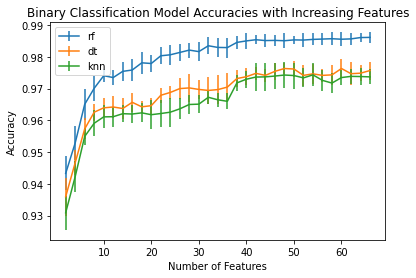

In [14]:
show_graph(figure=fig, feature_count=len(features), metrics_dict=bin_performance_metrics, exp_type='binary')